# **GridSearchCV** For Model optimization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('pima-indians-diabetes+%281%29.csv')
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X = df.drop('class',axis=1)
y=df['class']

# Divide your data into three(3) parts: Training, Validation and Testing data.

In [4]:
#save 20% of your dataset for final testing
# use 80% for training and validation process

# STEPS:
  #1. first divide our dataset into 80:20 (i.e. training(80) and testing(20))
  #2. next divide the 80 part to training and validation (i.e. whatever ratio you prefer)


X_train1, X_test, y_train1,y_test = train_test_split(X,y, test_size=.20,random_state=1)


X_train2, X_val, y_train2,y_val = train_test_split(X_train1,y_train1, test_size=.25,random_state=1)

In [5]:
print('Total dataset',len(X.values))
print('Total test data saved for future use: ',len(X_test+y_test))
print('Total training data: ',len(X_train2+y_train2))
print('Total validation data: ',len(X_val+y_val))

Total dataset 768
Total test data saved for future use:  154
Total training data:  460
Total validation data:  154


In [6]:
154+460+154

768

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()


In [8]:
knn_clf.fit(X_train2,y_train2)

KNeighborsClassifier()

In [9]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [10]:
param_grid = {'n_neighbors':list(range(1,9)),
               'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute')
               
                }

In [11]:
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(knn_clf,param_grid,cv=20)


In [12]:
gs.fit(X_train2,y_train2)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [13]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [14]:
gs.best_index_

7

In [15]:
gs.best_score_

0.7260869565217392

In [16]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

In [17]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [18]:
gs.cv_results_['mean_test_score']

array([0.67391304, 0.7       , 0.7       , 0.70652174, 0.7       ,
       0.71086957, 0.71521739, 0.72608696, 0.67391304, 0.7       ,
       0.7       , 0.70652174, 0.7       , 0.71086957, 0.71521739,
       0.72608696, 0.67391304, 0.7       , 0.7       , 0.70652174,
       0.7       , 0.71086957, 0.71521739, 0.72608696, 0.67391304,
       0.7       , 0.7       , 0.70652174, 0.7       , 0.71086957,
       0.71521739, 0.72608696])

In [19]:
gs.cv_results_

{'mean_fit_time': array([0.00495034, 0.00389986, 0.00425053, 0.00305015, 0.00389968,
        0.004599  , 0.00395061, 0.00450046, 0.00300052, 0.00315025,
        0.00285062, 0.00425012, 0.00335013, 0.00320042, 0.00220016,
        0.00195098, 0.00199968, 0.00215095, 0.00205024, 0.00224929,
        0.00215012, 0.00180027, 0.0020502 , 0.0018501 , 0.00150064,
        0.00195007, 0.00165001, 0.00169984, 0.0022006 , 0.00455222,
        0.00214994, 0.00185078]),
 'std_fit_time': array([0.00220243, 0.00062511, 0.00163903, 0.00086505, 0.0016999 ,
        0.00159355, 0.00139616, 0.00092206, 0.00070701, 0.0007923 ,
        0.00072634, 0.00147918, 0.00115204, 0.00092704, 0.0008722 ,
        0.00058997, 0.00063279, 0.00047716, 0.00021762, 0.00053506,
        0.00047663, 0.00040006, 0.00049807, 0.00035705, 0.00067144,
        0.00073993, 0.00057151, 0.00055691, 0.00067859, 0.00233628,
        0.00079217, 0.00057379]),
 'mean_score_time': array([0.00559996, 0.00464997, 0.00459974, 0.00395033, 0.004750

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=8, algorithm='auto')

knn_clf.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=8)

In [21]:
from sklearn import metrics

y_pred = knn_clf.predict(X_test)

print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7467532467532467


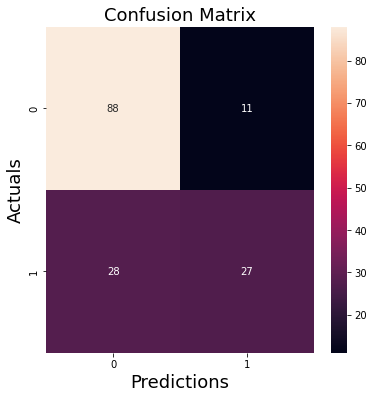

In [22]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6, 6))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)
 
# fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [23]:

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.71      0.49      0.58        55

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154



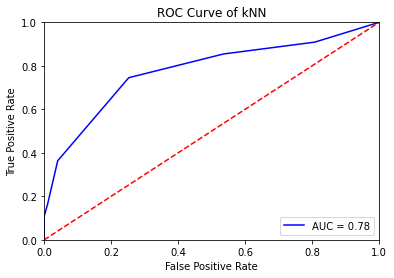

In [24]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_scores = knn_clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Another example of Gridsearch CV with Pipeline and ROC/AUC

In [25]:
df_wisc=pd.read_csv('wisc_bc_data.csv')
df_wisc


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [26]:
X_wisc=df_wisc.iloc[:,2:].values
y_wisc=df_wisc.iloc[:,1].values

In [27]:
X_wisc

array([[1.232e+01, 1.239e+01, 7.885e+01, ..., 9.391e-02, 2.827e-01,
        6.771e-02],
       [1.060e+01, 1.895e+01, 6.928e+01, ..., 7.926e-02, 2.940e-01,
        7.587e-02],
       [1.104e+01, 1.683e+01, 7.092e+01, ..., 7.431e-02, 2.998e-01,
        7.881e-02],
       ...,
       [1.528e+01, 2.241e+01, 9.892e+01, ..., 1.226e-01, 3.175e-01,
        9.772e-02],
       [1.453e+01, 1.398e+01, 9.386e+01, ..., 1.069e-01, 2.606e-01,
        7.810e-02],
       [2.137e+01, 1.510e+01, 1.413e+02, ..., 1.966e-01, 2.730e-01,
        8.666e-02]])

In [28]:
y_wisc

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()
y_wisc=le.fit_transform(y_wisc)

In [31]:
y_wisc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [32]:
le.transform(['M','B'])

array([1, 0])

## 'M' transformed to 1 and 'B' transformed to 0

In [33]:
#save 20% of your dataset for final testing
# use 80% for training and validation process

# STEPS:
  #1. first divide our dataset into 80:20 (i.e. training(80) and testing(20))
  #2. next divide the 80 part to training and validation (i.e. whatever ratio you prefer)


X_wisc_train1, X_wisc_test, y_wisc_train1,y_wisc_test = train_test_split(X_wisc,y_wisc, test_size=.20,random_state=1)


X_wisc_train2, X_wisc_val, y_wisc_train2,y_wisc_val = train_test_split(X_wisc_train1,y_wisc_train1, test_size=.25,random_state=1)

In [34]:
print('Total dataset',len(X_wisc))
print('Total test data saved for future use: ',len(X_wisc_test))
print('Total training data: ',len(X_wisc_train2))
print('Total validation data: ',len(X_wisc_val))

Total dataset 569
Total test data saved for future use:  114
Total training data:  341
Total validation data:  114


### implement Pipeline

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [36]:
pipe_svc=Pipeline([('scl',StandardScaler()),('pca',PCA()),('svc',SVC())])
pipe_svc.fit(X_wisc_train2,y_wisc_train2)
print('Test accuracy:{:.2f}%'.format(pipe_svc.score(X_wisc_test,y_wisc_test)*100))

Test accuracy:96.49%


# Perofrm Hyperparameter tuning using Gridsearch

In [37]:
StandardScaler().get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [38]:
PCA().get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [39]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [40]:
pipe_svc=Pipeline([('scl',StandardScaler()),('pca',PCA()),('svc',SVC())])

In [41]:
param_grid2 = {'pca__n_components':[10,11,12,13,14,15,16,17,18],
               'svc__C':[0.001,0.01,0.1,1,10,100],
               'svc__gamma':[0.001,0.01,0.1,1,10,100],
               'svc__kernel':['rbf','poly']
               }

In [42]:
gs_2=GridSearchCV(pipe_svc, param_grid=param_grid2, cv=5)


In [43]:
gs_2.fit(X_wisc_train2,y_wisc_train2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [10, 11, 12, 13, 14, 15, 16, 17,
                                               18],
                         'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['rbf', 'poly']})

In [44]:
print('Best cross validation accuracy: {:.2f}%'.format(gs_2.best_score_*100))
print('Best parameter: {}'.format(gs_2.best_params_))
print('validation score: {:.2f}%'.format(gs_2.score(X_wisc_val,y_wisc_val)*100))

Best cross validation accuracy: 98.24%
Best parameter: {'pca__n_components': 11, 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
validation score: 96.49%


### implement best parameter to the pipeline again

In [45]:
pipe_svc=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=11)),('svc',SVC(C=10, gamma=0.01,kernel='rbf',probability=True))])


In [46]:
pipe_svc.fit(X_wisc_train2,y_wisc_train2)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=11)),
                ('svc', SVC(C=10, gamma=0.01, probability=True))])

In [47]:
print('Test score: {:.2f}%'.format(pipe_svc.score(X_wisc_test,y_wisc_test)*100))

Test score: 95.61%


In [48]:
y_wisc_pred=pipe_svc.predict(X_wisc_test)
y_wisc_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1])

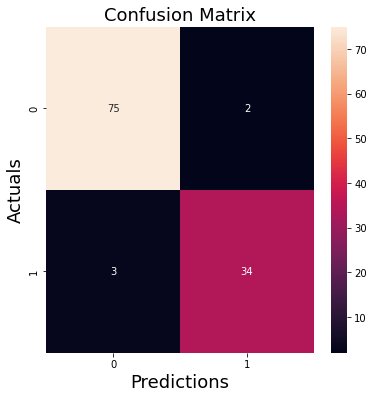

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


conf_matrix_wisc = confusion_matrix(y_wisc_test,y_wisc_pred)

plt.figure(figsize=(6, 6))
import seaborn as sns
sns.heatmap(conf_matrix_wisc, annot=True)
 
# fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [50]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_wisc_test, y_wisc_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.94      0.92      0.93        37

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# plot ROC/AUC

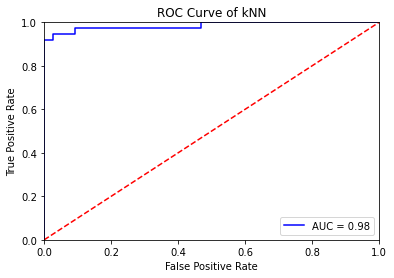

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

y_wisc_scores = pipe_svc.predict_proba(X_wisc_test)
fpr, tpr, threshold = roc_curve(y_wisc_test, y_wisc_scores[:, 1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()